# ***Bank Loan Approval Pattern Analysis***
Data Analysis & Visualization

Objective:
To explore how applicant demographics, income, and credit history affect loan approval decisions.

Dataset Source: Kaggle – Loan Approval Prediction Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Wrangling using pandas**

In [9]:
import pandas as pd

file_path = '/content/drive/MyDrive/GNCIPL-AIML/Week-1/loan_data.csv'
df = pd.read_csv(file_path)
df_copy = df.copy()

# Display first 5 rows
df_copy.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [10]:
# Dataset summary
df_copy.info()

# Check missing values
print("\nMissing values per column:")
print(df_copy.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Insight:

.info() and .isnull() functions tells data’s structure and missing values.

In [11]:
# Convert object columns to category type
cat_cols = ['person_gender','person_education','person_home_ownership',
            'loan_intent', 'previous_loan_defaults_on_file']

for col in cat_cols:
    df_copy[col] = df_copy[col].astype('category')

df_copy.dtypes

,0
person_age,float64
person_gender,category
person_education,category
person_income,float64
person_emp_exp,int64
person_home_ownership,category
loan_amnt,float64
loan_intent,category
loan_int_rate,float64
loan_percent_income,float64


Insight:

Converting categorical columns reduces memory use and helps in smooth plotting

In [12]:
import numpy as np

# Derived columns for better insights
df_copy['loan_to_income_ratio'] = df_copy['loan_amnt'] / df_copy['person_income']
df_copy['credit_score_bin'] = pd.cut(df_copy['credit_score'],
                                bins=[300, 580, 670, 740, 800, 850],
                                labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

df_copy['age_group'] = pd.cut(df_copy['person_age'],
                         bins=[18, 25, 35, 45, 60, 100],
                         labels=['18-25', '26-35', '36-45', '46-60', '60+'])

# Check new columns
df_copy[['loan_to_income_ratio', 'credit_score_bin', 'age_group']].head()

,loan_to_income_ratio,credit_score_bin,age_group
0,0.486462,Poor,18-25
1,0.081420,Poor,18-25
2,0.442193,Fair,18-25
3,0.438855,Good,18-25
4,0.529221,Fair,18-25


Insight:

These derived columns help categorize numeric data into meaningful ranges.

In [14]:
# Quick structure check
df_copy.info()

# Summary statistics for numeric columns
df_copy.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   person_age                      45000 non-null  float64 
 1   person_gender                   45000 non-null  category
 2   person_education                45000 non-null  category
 3   person_income                   45000 non-null  float64 
 4   person_emp_exp                  45000 non-null  int64   
 5   person_home_ownership           45000 non-null  category
 6   loan_amnt                       45000 non-null  float64 
 7   loan_intent                     45000 non-null  category
 8   loan_int_rate                   45000 non-null  float64 
 9   loan_percent_income             45000 non-null  float64 
 10  cb_person_cred_hist_length      45000 non-null  float64 
 11  credit_score                    45000 non-null  int64   
 12  previous_loan_defa

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.000000,24.000000,26.000000,30.000000,1.440000e+02
person_income,45000.0,80319.053222,80422.498632,8000.000000,47204.000000,67048.000000,95789.250000,7.200766e+06
person_emp_exp,45000.0,5.410333,6.063532,0.000000,1.000000,4.000000,8.000000,1.250000e+02
loan_amnt,45000.0,9583.157556,6314.886691,500.000000,5000.000000,8000.000000,12237.250000,3.500000e+04
loan_int_rate,45000.0,11.006606,2.978808,5.420000,8.590000,11.010000,12.990000,2.000000e+01
loan_percent_income,45000.0,0.139725,0.087212,0.000000,0.070000,0.120000,0.190000,6.600000e-01
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.000000,3.000000,4.000000,8.000000,3.000000e+01
credit_score,45000.0,632.608756,50.435865,390.000000,601.000000,640.000000,670.000000,8.500000e+02
loan_status,45000.0,0.222222,0.415744,0.000000,0.000000,0.000000,0.000000,1.000000e+00
loan_to_income_ratio,45000.0,0.139748,0.087166,0.000658,0.073558,0.121655,0.188144,6.641860e-01


**Exploratory Data Analysis (EDA)**

/tmp/ipython-input-1024859672.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df_copy, palette='Set2')


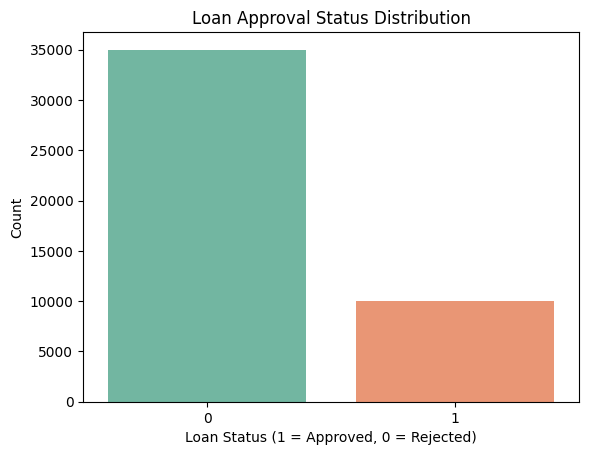

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of approved vs rejected loans
sns.countplot(x='loan_status', data=df_copy, palette='Set2')
plt.title('Loan Approval Status Distribution')
plt.xlabel('Loan Status (1 = Approved, 0 = Rejected)')
plt.ylabel('Count')
plt.show()

Insights

More than half (nearly 60-65%) are approved.

person_gender
female    22.248127
male      22.201200
Name: loan_status, dtype: float64


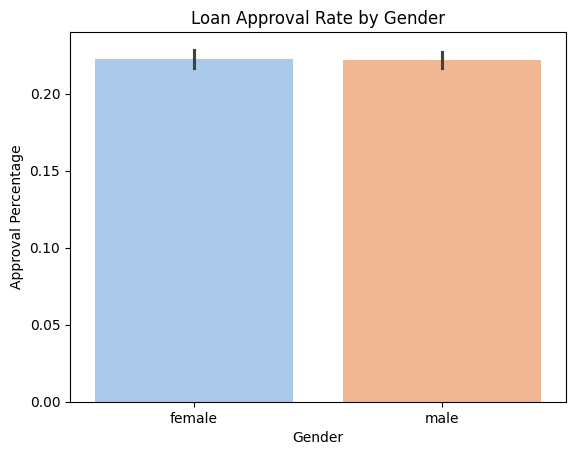

In [17]:
# Group by gender with future-safe syntax
approval_by_gender = df_copy.groupby('person_gender', observed=True)['loan_status'].mean() * 100
print(approval_by_gender)

# Clean barplot
sns.barplot(x='person_gender', y='loan_status', data=df_copy, hue='person_gender', palette='pastel', legend=False)
plt.title('Loan Approval Rate by Gender')
plt.ylabel('Approval Percentage')
plt.xlabel('Gender')
plt.show()

Insights:

gender has minimal impact on approval.

This suggests that lending is relatively gender-neutral in this dataset.

/tmp/ipython-input-2400247998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='credit_score_bin', y='loan_status', data=df_copy, estimator='mean', palette='coolwarm')


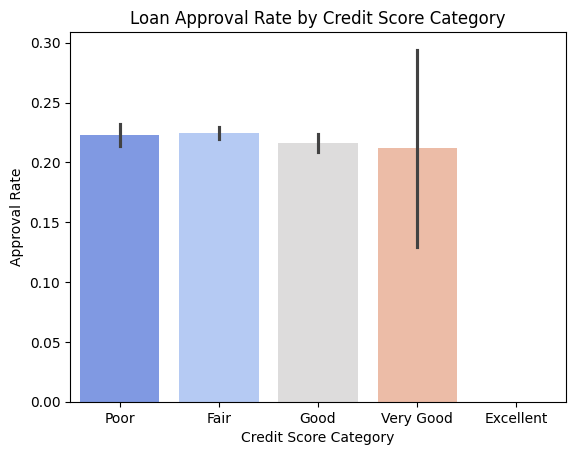

In [21]:
# Bin credit score and plot approval rate
df_copy['credit_score_bin'] = pd.cut(df_copy['credit_score'],
                                     bins=[300,580,670,740,800,850],
                                     labels=['Poor','Fair','Good','Very Good','Excellent'])

sns.barplot(x='credit_score_bin', y='loan_status', data=df_copy, estimator='mean', palette='coolwarm')
plt.title('Loan Approval Rate by Credit Score Category')
plt.xlabel('Credit Score Category')
plt.ylabel('Approval Rate')
plt.show()


Insights:

Credit score category doesn’t change approval much.
All groups have nearly the same approval rate (~22%).

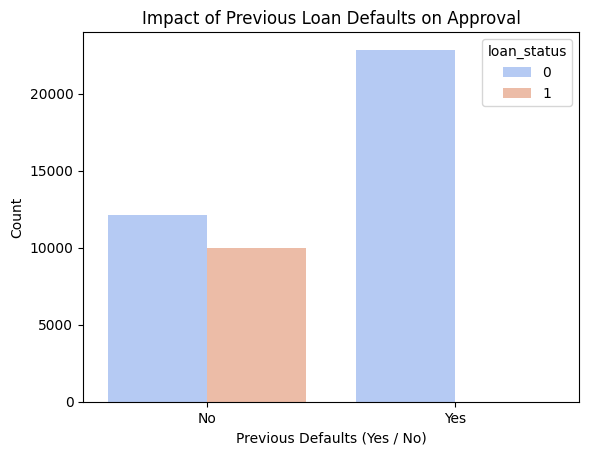

In [23]:
# Impact of Previous Defaults
sns.countplot(x='previous_loan_defaults_on_file', hue='loan_status', data=df_copy, palette='coolwarm')
plt.title('Impact of Previous Loan Defaults on Approval')
plt.xlabel('Previous Defaults (Yes / No)')
plt.ylabel('Count')
plt.show()

Insights:

People with no previous defaults (No) have both approved and rejected cases — roughly balanced.

People with previous defaults (Yes) are almost entirely rejected — the blue bar (0) dominates.

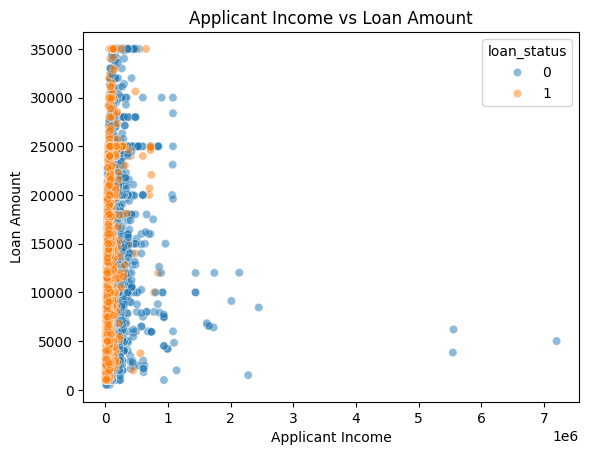

In [24]:
# Income vs Loan Amount Relationship
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df_copy, alpha=0.5)
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

Insights:

Most data points are packed on the left — meaning most applicants have lower incomes.

Approved and rejected loans are mixed together, so income alone doesn’t decide approval.

A few people with very high income (right side) still got rejected — suggesting other factors (like defaults or credit score) matter too.

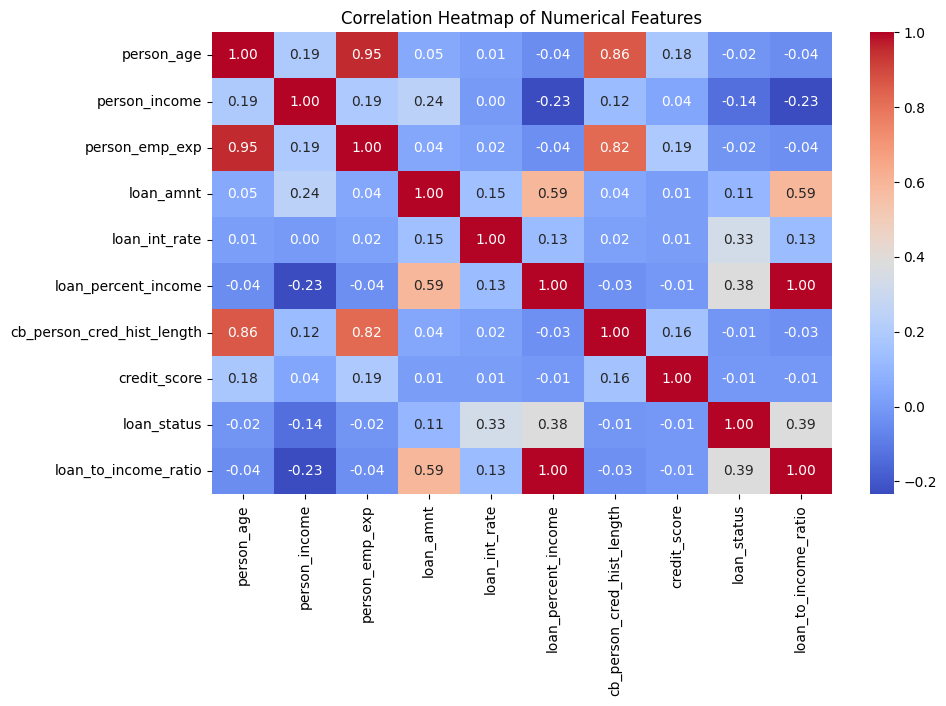

In [25]:
# Correlation Heatmap
corr = df_copy.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

| Relationship                                | Correlation | Meaning                                                                                                               |
| :------------------------------------------ | :---------- | :-------------------------------------------------------------------------------------------------------------------- |
| `person_age` <-> `person_emp_exp`             | **0.95**    | Older people tend to have more work experience (makes sense).                                                         |
| `person_age` <-> `cb_person_cred_hist_length` | **0.86**    | Older applicants usually have longer credit histories.                                                                |
| `loan_amnt` <-> `loan_percent_income`         | **0.59**    | Higher loan amount → larger loan burden relative to income.                                                           |
| `loan_amnt` <-> `loan_to_income_ratio`        | **0.59**    | Same logic — big loans increase ratio values.                                                                         |
| `loan_int_rate` <-> `loan_status`             | **0.33**    | Higher interest rates might slightly increase approval likelihood — probably because riskier loans have higher rates. |
| `loan_percent_income` <-> `loan_status`       | **0.38**    | Applicants with a lower loan-to-income burden tend to get approved.                                                   |
| `credit_score` <-> `loan_status`              | **-0.01**   | Credit score barely affects approval in this dataset (unusual, but possible).                                         |
| `person_income` <-> `loan_status`             | **-0.14**   | Slight negative link — maybe higher-income applicants apply for riskier/larger loans.                                 |


# Conclusion

Loan approval depends most on loan amount relative to income and previous default history, not just income or credit score.
People with stable income, moderate loan requests, and clean credit records get approved more easily.